# NEWS MOOD_BDS

**Observation 1:** Fox News has been the most positive news organization, CNN the most negative, over the last 100 tweets<br>
**Observation 2:** The same media organizations that come closest to extreme negative tweets (-1.0) also come the closest to extreme positive tweets (+1.0)<br>
**Observation 3:** The New York Times seems to be the most moderate tweeter (or balance negative with positive), with an average polarity score of -0.01 over the past 100 tweets<br>

In [55]:
#Import Dependencies
import tweepy
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [18]:
# Get the last 100 tweets for each news org, analyze with VADER, store it in a dataframe
news_orgs = ("@BBCBreaking", "@CBSNews", "@cnnbrk", "@FoxNews", "@nytimes")

oldestTweet = None
News_Sense_df = pd.DataFrame()

for org in news_orgs:
    oldest_tweet = None
   
    sentiments = []
    tweet_times = []
    
    for x in range(1, 6):
        public_tweets = api.user_timeline(org,
                                          page=x, 
                                          result_type="recent", 
                                          tweet_mode="extended",
                                          max_id = oldest_tweet)
        for tweet in public_tweets:
            sent_result = analyzer.polarity_scores(tweet["full_text"])
            sentiments.append(sent_result["compound"])
            tweet_times.append(tweet["created_at"])
            oldest_tweet = tweet["id"] - 1
            
    News_Sense_df[org + "_sents"] = sentiments
    News_Sense_df[org + "_ttime"] = tweet_times
            

In [21]:
News_Sense_df.head()

,@BBCBreaking_sents,@BBCBreaking_ttime,@CBSNews_sents,@CBSNews_ttime,@cnnbrk_sents,@cnnbrk_ttime,@FoxNews_sents,@FoxNews_ttime,@nytimes_sents,@nytimes_ttime
0,0.6688,Sat Jul 14 16:23:05 +0000 2018,-0.8402,Sun Jul 15 02:03:04 +0000 2018,-0.6705,Sun Jul 15 02:02:36 +0000 2018,-0.4939,Sun Jul 15 02:15:58 +0000 2018,0.0000,Sun Jul 15 02:13:14 +0000 2018
1,-0.0516,Sat Jul 14 15:52:16 +0000 2018,0.0000,Sun Jul 15 01:48:04 +0000 2018,-0.7964,Sat Jul 14 22:15:27 +0000 2018,0.5574,Sun Jul 15 02:05:17 +0000 2018,0.5423,Sun Jul 15 01:56:10 +0000 2018
2,0.0000,Sat Jul 14 14:34:06 +0000 2018,-0.8402,Sun Jul 15 01:40:07 +0000 2018,0.7717,Sat Jul 14 16:52:18 +0000 2018,0.0000,Sun Jul 15 02:02:58 +0000 2018,0.0000,Sun Jul 15 01:39:40 +0000 2018
3,-0.4753,Fri Jul 13 18:47:11 +0000 2018,-0.6486,Sun Jul 15 01:33:03 +0000 2018,0.7717,Sat Jul 14 16:31:12 +0000 2018,0.0000,Sun Jul 15 01:50:28 +0000 2018,-0.4404,Sun Jul 15 01:23:20 +0000 2018
4,-0.7906,Fri Jul 13 16:46:13 +0000 2018,-0.6486,Sun Jul 15 01:18:03 +0000 2018,0.0000,Sat Jul 14 16:03:24 +0000 2018,0.8588,Sun Jul 15 01:33:49 +0000 2018,-0.8555,Sun Jul 15 01:07:13 +0000 2018


In [87]:
# Get the average sentiment of the last 100 tweets for each news organization, store in a dataframe
average_sent = []

for org in news_orgs:
    avg_sent = News_Sense_df[org + "_sents"].mean()
    average_sent.append(avg_sent)

news_orgs_present = ("BBC", "CBS", "CNN", "Fox", "NYT")
Averages_df = pd.DataFrame({"Organization" : news_orgs_present,
                           "Average Sentiment": average_sent})
Averages_df = Averages_df[["Organization", "Average Sentiment"]]
Averages_df

,Organization,Average Sentiment
0,BBC,-0.116790
1,CBS,-0.130990
2,CNN,-0.100812
3,Fox,0.066101
4,NYT,-0.010673


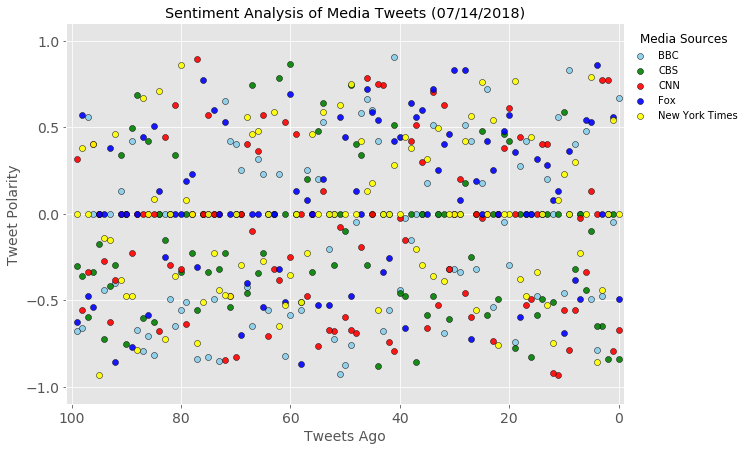

In [116]:
# Plot the sentiments chart
plt.figure(figsize=(10,7))
plt.scatter(np.arange(0,100,1),News_Sense_df["@BBCBreaking_sents"], alpha=0.9, facecolors="skyblue", edgecolors="black", label="BBC")
plt.scatter(np.arange(0,100,1),News_Sense_df["@CBSNews_sents"], alpha=0.9, facecolors="green", edgecolors="black", label="CBS")
plt.scatter(np.arange(0,100,1),News_Sense_df["@cnnbrk_sents"], alpha=0.9, facecolors="red", edgecolors="black", label="CNN")
plt.scatter(np.arange(0,100,1),News_Sense_df["@FoxNews_sents"], alpha=0.9, facecolors="blue", edgecolors="black", label="Fox")
plt.scatter(np.arange(0,100,1),News_Sense_df["@nytimes_sents"], alpha=0.9, facecolors="yellow", edgecolors="black", label="New York Times")
plt.xlim(101,-1)
plt.xlabel("Tweets Ago", fontsize=14)
plt.yticks(np.arange(-1, 1.4, step=0.5))
plt.ylim(-1.1,1.1)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
analysis_date = datetime.now()
date = datetime.strftime(analysis_date, '%m/%d/%Y')
plt.title(f"Sentiment Analysis of Media Tweets ({date})")
leg = plt.legend(bbox_to_anchor=(1.22,1), loc="upper right", frameon=1)
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
leg.set_title("Media Sources", prop = {'size':'12'})
plt.savefig("Media Sentiment Analysis_100 Tweets.png", bbox_inches="tight")
plt.show()

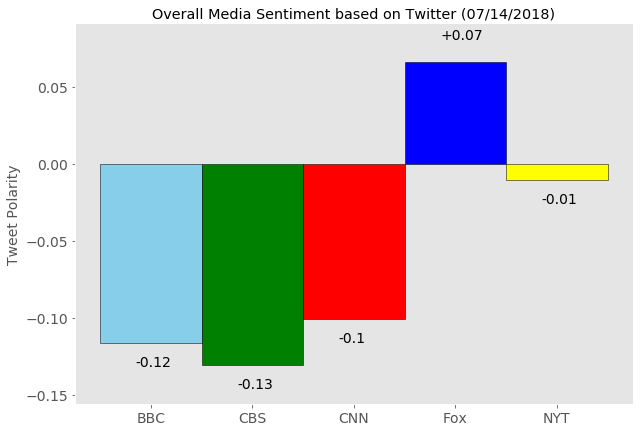

In [132]:
plt.figure(figsize=(10,7))
my_colors = ["skyblue", "green", "red", "blue", "yellow"]
plt.bar(news_orgs_present, average_sent, alpha=1, edgecolor="black", width=1, color=my_colors)
plt.grid(False)
plt.ylim(min(average_sent) - 0.025, max(average_sent) + 0.025)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
for x, y in enumerate(average_sent):
    if y > 0.0:
        plt.text(x-0.15, y + .015, "+" + str(round(y,2)), color='black', fontsize=14)
    else:
        plt.text(x-0.15, y - .015, str(round(y,2)), color='black', fontsize=14) 

plt.title(f"Overall Media Sentiment based on Twitter ({date})")
plt.savefig("Average Media Sentiment.png")